# Proyecto CRISP-DM con Análisis Predictivo

# FASE 1-2: Conexión y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pyodbc

print("FASE 1: Comprensión del Negocio")
print("Objetivo: Analizar patrones de temperatura por estación y ubicación")

FASE 1: Comprensión del Negocio
Objetivo: Analizar patrones de temperatura por estación y ubicación


# Conexión a SQL

In [2]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost\\SQLEXPRESS;'
    'DATABASE=PATRICIO;'
    'Trusted_Connection=yes;'
)

#  Cargar datos
df = pd.read_sql("SELECT * FROM Temperatura", conn)
print(f"Datos cargados: {df.shape[0]} filas x {df.shape[1]} columnas")

C:\Users\Llels\AppData\Local\Temp\ipykernel_17768\3003733307.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Temperatura", conn)


Datos cargados: 13350 filas x 12 columnas


# FASE 3: Preparación de Datos para Predicción

In [3]:
print("\nFASE 3: Preparación de los Datos")

# Verificar estructura
print("Estructura de los datos:")
print(df.info())

# Convertir tipos de datos
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'])
df['ValorObservado'] = pd.to_numeric(df['ValorObservado'], errors='coerce')  # Convertir a numérico

# Verificar conversión
print(f"\nValorObservado convertido a numérico")
print(f"   Valores convertidos: {df['ValorObservado'].notna().sum()}")
print(f"   Valores no convertidos: {df['ValorObservado'].isna().sum()}")



FASE 3: Preparación de los Datos
Estructura de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13350 entries, 0 to 13349
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CodigoEstacion     13350 non-null  object        
 1   CodigoSensor       13350 non-null  object        
 2   FechaObservacion   13350 non-null  datetime64[ns]
 3   ValorObservado     13350 non-null  object        
 4   NombreEstacion     13350 non-null  object        
 5   Departamento       13350 non-null  object        
 6   Municipio          13350 non-null  object        
 7   ZonaHidrografica   13350 non-null  object        
 8   Latitud            13350 non-null  object        
 9   Longitud           13350 non-null  object        
 10  DescripcionSensor  13350 non-null  object        
 11  UnidadMedida       13350 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 1.2+ MB
No

In [4]:
# Análisis de valores nulos
print("\nAnálisis de valores nulos:")
nulos = df.isnull().sum()
for col, count in nulos.items():
    if count > 0:
        print(f"   {col}: {count} nulos ({(count/len(df))*100:.1f}%)")


Análisis de valores nulos:


# FASE 4: Modelado Predictivo

In [5]:
print("\nFASE 4: Análisis Exploratorio")

# Estadísticas básicas de temperatura
print("Estadísticas de Temperatura:")
print(f"   Media: {df['ValorObservado'].mean():.2f}°C")
print(f"   Máxima: {df['ValorObservado'].max():.2f}°C")
print(f"   Mínima: {df['ValorObservado'].min():.2f}°C")
print(f"   Desviación: {df['ValorObservado'].std():.2f}°C")


FASE 4: Análisis Exploratorio
Estadísticas de Temperatura:
   Media: 20.22°C
   Máxima: 45.50°C
   Mínima: 0.00°C
   Desviación: 8.04°C


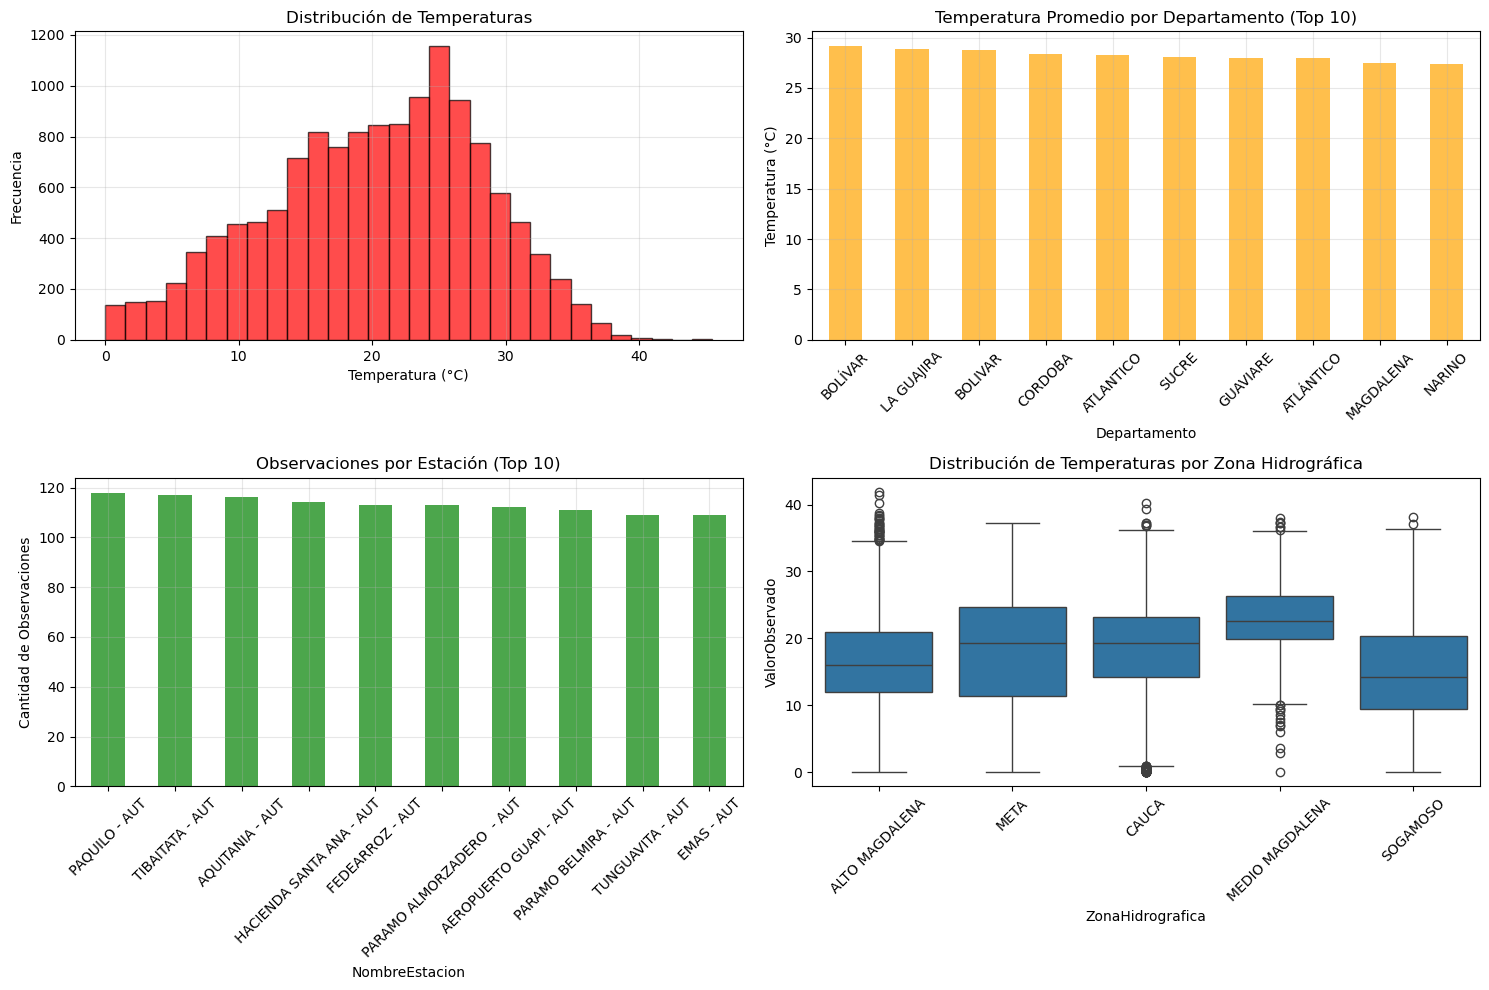

In [6]:
# 1. Distribución de temperaturas
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df['ValorObservado'].dropna(), bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribución de Temperaturas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# 2. Temperatura por departamento
plt.subplot(2, 2, 2)
temp_por_depto = df.groupby('Departamento')['ValorObservado'].mean().sort_values(ascending=False).head(10)
temp_por_depto.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Temperatura Promedio por Departamento (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)

# 3. Cantidad de observaciones por estación 
plt.subplot(2, 2, 3)
obs_por_estacion = df['NombreEstacion'].value_counts().head(10)
obs_por_estacion.plot(kind='bar', color='green', alpha=0.7)
plt.title('Observaciones por Estación (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de Observaciones')
plt.grid(True, alpha=0.3)

# 4. Boxplot de temperaturas por zonal hidrográfica
plt.subplot(2, 2, 4)
df_boxplot = df[df['ZonaHidrografica'].isin(df['ZonaHidrografica'].value_counts().head(5).index)]
sns.boxplot(data=df_boxplot, x='ZonaHidrografica', y='ValorObservado')
plt.title('Distribución de Temperaturas por Zona Hidrográfica')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Análisis Temporal de Temperaturas


Análisis Temporal


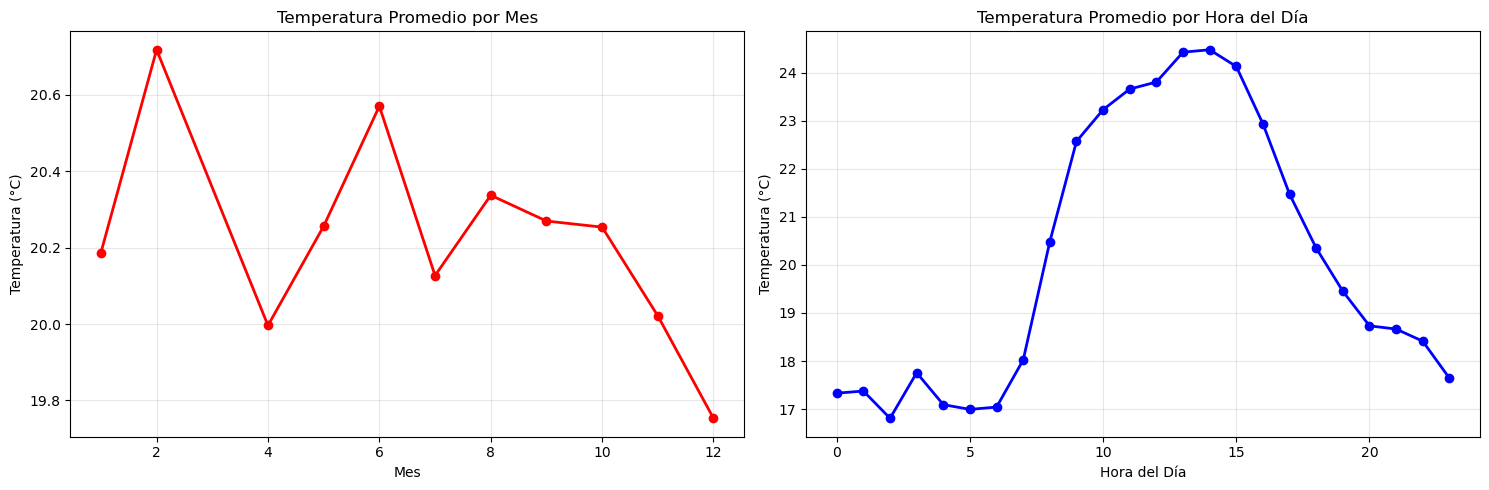

In [7]:
print("\nAnálisis Temporal")

# Extraer componentes de fecha
df['Año'] = df['FechaObservacion'].dt.year
df['Mes'] = df['FechaObservacion'].dt.month
df['Dia'] = df['FechaObservacion'].dt.day
df['Hora'] = df['FechaObservacion'].dt.hour

# Evolución de temperatura por mes
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
temp_por_mes = df.groupby('Mes')['ValorObservado'].mean()
plt.plot(temp_por_mes.index, temp_por_mes.values, marker='o', linewidth=2, color='red')
plt.title('Temperatura Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)

# Evolución de temperatura por hora del día
plt.subplot(1, 2, 2)
temp_por_hora = df.groupby('Hora')['ValorObservado'].mean()
plt.plot(temp_por_hora.index, temp_por_hora.values, marker='o', linewidth=2, color='blue')
plt.title('Temperatura Promedio por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# FASE 5: Análisis Geográfico


FASE 5: Análisis Geográfico


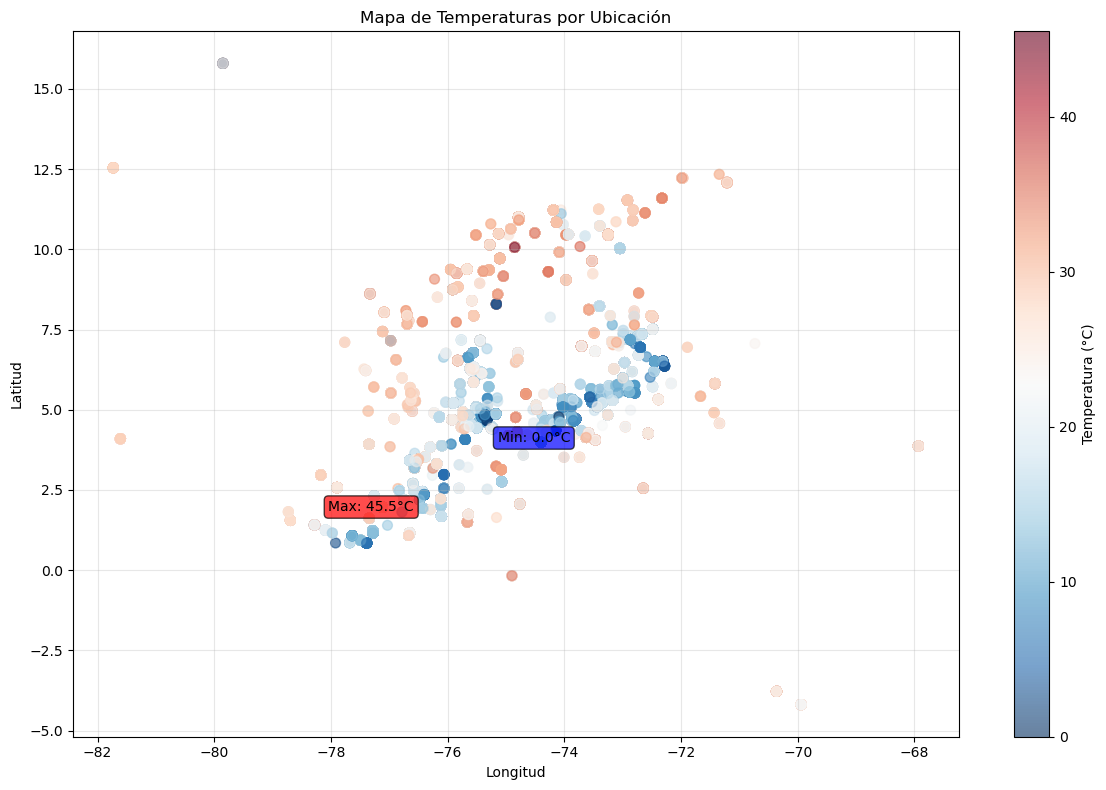

In [8]:
print("\nFASE 5: Análisis Geográfico")

# Convertir coordenadas a numéricas
df['Latitud'] = pd.to_numeric(df['Latitud'], errors='coerce')
df['Longitud'] = pd.to_numeric(df['Longitud'], errors='coerce')

# Crear mapa de temperaturas
plt.figure(figsize=(12, 8))

# Scatter plot de ubicaciones con temperatura como color
scatter = plt.scatter(df['Longitud'], df['Latitud'], 
                     c=df['ValorObservado'], cmap='RdBu_r', 
                     alpha=0.6, s=50)
plt.colorbar(scatter, label='Temperatura (°C)')
plt.title('Mapa de Temperaturas por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)

# Añadir etiquetas para las estaciones con temperaturas extremas
max_temp_idx = df['ValorObservado'].idxmax()
min_temp_idx = df['ValorObservado'].idxmin()

plt.annotate(f"Max: {df.loc[max_temp_idx, 'ValorObservado']:.1f}°C", 
             (df.loc[max_temp_idx, 'Longitud'], df.loc[max_temp_idx, 'Latitud']),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7))

plt.annotate(f"Min: {df.loc[min_temp_idx, 'ValorObservado']:.1f}°C", 
             (df.loc[min_temp_idx, 'Longitud'], df.loc[min_temp_idx, 'Latitud']),
             xytext=(10, -20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7))

plt.tight_layout()
plt.show()


FASE 6: Análisis de Patrones


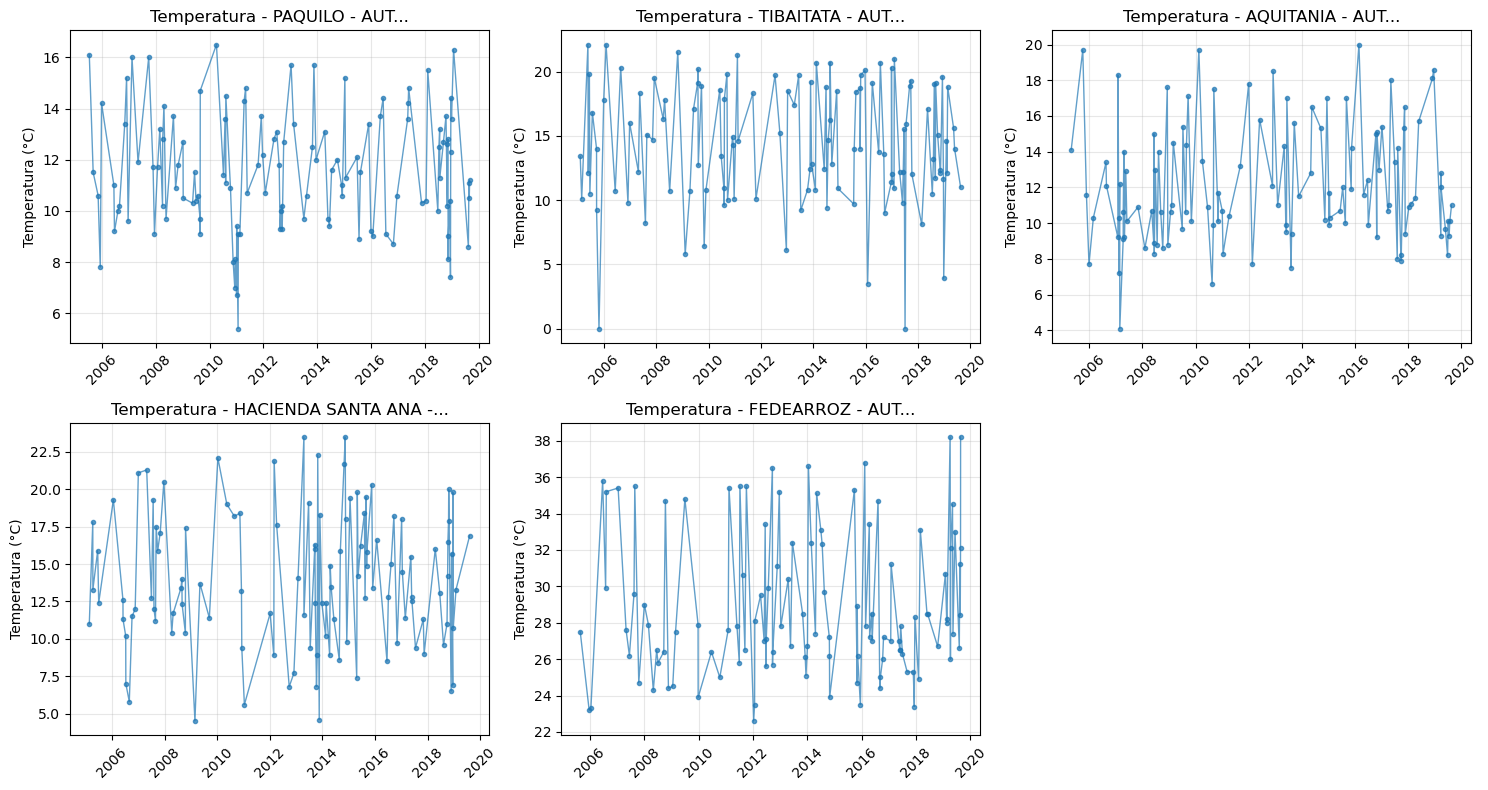

In [9]:
# Análisis de correlaciones temporales
print("\nFASE 6: Análisis de Patrones")

# Top 5 estaciones con más datos
top_estaciones = df['NombreEstacion'].value_counts().head(5).index

plt.figure(figsize=(15, 8))
for i, estacion in enumerate(top_estaciones):
    datos_estacion = df[df['NombreEstacion'] == estacion].sort_values('FechaObservacion')
    
    plt.subplot(2, 3, i+1)
    plt.plot(datos_estacion['FechaObservacion'], datos_estacion['ValorObservado'], 
             marker='.', linewidth=1, alpha=0.7)
    plt.title(f'Temperatura - {estacion[:20]}...')
    plt.xticks(rotation=45)
    plt.ylabel('Temperatura (°C)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Predicción Simple con Promedio Móvil


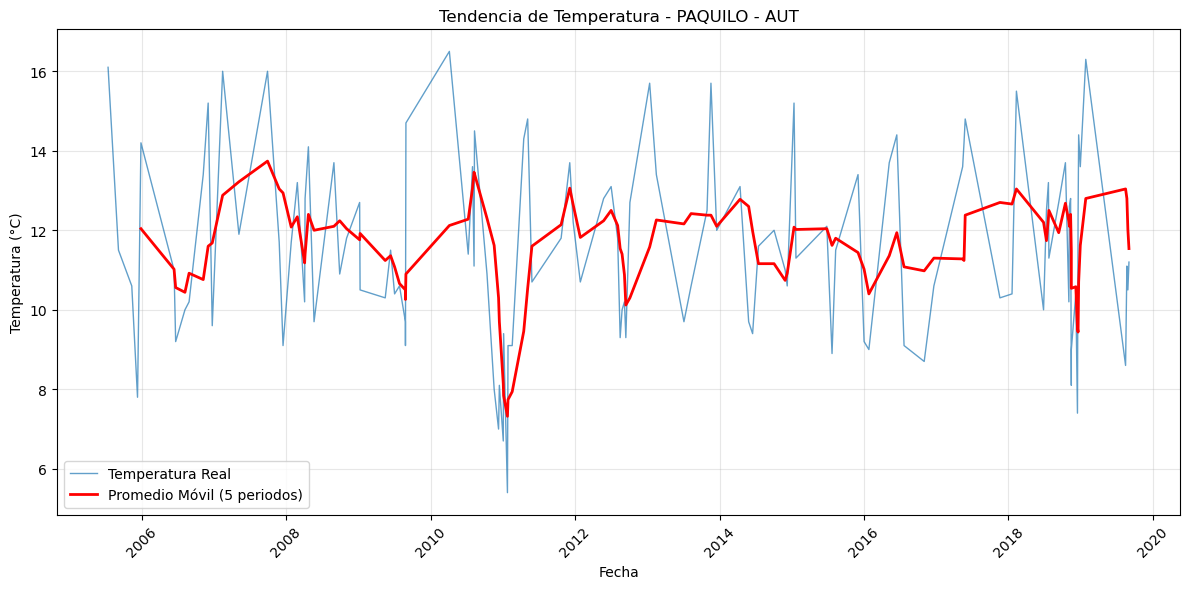

In [10]:
# Predicción simple usando promedio móvil
print("\nPredicción Simple con Promedio Móvil")

# Tomar una estación para ejemplo
estacion_ejemplo = df['NombreEstacion'].value_counts().index[0]
datos_ejemplo = df[df['NombreEstacion'] == estacion_ejemplo].sort_values('FechaObservacion')

# Calcular promedio móvil de 5 periodos
datos_ejemplo['PromedioMovil'] = datos_ejemplo['ValorObservado'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(datos_ejemplo['FechaObservacion'], datos_ejemplo['ValorObservado'], 
         label='Temperatura Real', alpha=0.7, linewidth=1)
plt.plot(datos_ejemplo['FechaObservacion'], datos_ejemplo['PromedioMovil'], 
         label='Promedio Móvil (5 periodos)', linewidth=2, color='red')
plt.title(f'Tendencia de Temperatura - {estacion_ejemplo}')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FASE 6: Despliegue de Resultados

In [11]:
print("\nFASE 6: Despliegue")

# Resumen ejecutivo
print("RESUMEN EJECUTIVO:")
print(f"• Estaciones monitoreadas: {df['NombreEstacion'].nunique()}")
print(f"• Departamentos cubiertos: {df['Departamento'].nunique()}")
print(f"• Rango de temperaturas: {df['ValorObservado'].min():.1f}°C a {df['ValorObservado'].max():.1f}°C")
print(f"• Período de datos: {df['FechaObservacion'].min().strftime('%Y-%m-%d')} a {df['FechaObservacion'].max().strftime('%Y-%m-%d')}")

# Hallazgos principales
mes_calido = temp_por_mes.idxmax()
mes_frio = temp_por_mes.idxmin()
hora_calida = temp_por_hora.idxmax()
hora_fria = temp_por_hora.idxmin()

print(f"\nHALLAZGOS PRINCIPALES:")
print(f"• Mes más cálido: Mes {mes_calido} ({temp_por_mes.max():.1f}°C)")
print(f"• Mes más frío: Mes {mes_frio} ({temp_por_mes.min():.1f}°C)")
print(f"• Hora más cálida: {hora_calida}:00 h ({temp_por_hora.max():.1f}°C)")
print(f"• Hora más fría: {hora_fria}:00 h ({temp_por_hora.min():.1f}°C)")

# Exportar datos procesados
df.to_csv('temperaturas_analizadas.csv', index=False)
print(f"\n✅ Datos exportados: 'temperaturas_analizadas.csv'")


FASE 6: Despliegue
RESUMEN EJECUTIVO:
• Estaciones monitoreadas: 346
• Departamentos cubiertos: 37
• Rango de temperaturas: 0.0°C a 45.5°C
• Período de datos: 2001-02-14 a 2019-09-14

HALLAZGOS PRINCIPALES:
• Mes más cálido: Mes 2 (20.7°C)
• Mes más frío: Mes 12 (19.8°C)
• Hora más cálida: 14:00 h (24.5°C)
• Hora más fría: 2:00 h (16.8°C)

✅ Datos exportados: 'temperaturas_analizadas.csv'
